# 1. Univariate Regression(단변량 회귀분석)

### 1.1 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

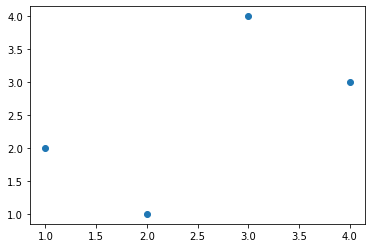

In [2]:
X = np.array([1,2,3,4])
y = np.array([2,1,4,3])

plt.scatter(X, y)

### 1.2 Data Trans

In [3]:
print(X)
print(X.shape)

[1 2 3 4]
(4,)


In [4]:
data = X.reshape(-1, 1)

print(data)
print(data.shape)

[[1]
 [2]
 [3]
 [4]]
(4, 1)


### 1.3 Learning

In [5]:
from sklearn.linear_model import LinearRegression

# 모델 변수 선언
model = LinearRegression()

# 모델 학습
model.fit(X=data, y=y)

# 모델 식 확인
print(model.intercept_)

# 회귀계수 확인
print(model.coef_)

1.0000000000000004
[0.6]


위의 두 결과로 다음과 같은 회귀선을 얻을 수 있다.  
`y = 1.0000000000000004 + 0.6 * x`

### 1.4 Predict

In [6]:
# X(data)는 예측하고자 하는 데이터
pred = model.predict(data)

# 예측 결과
pred

array([1.6, 2.2, 2.8, 3.4])

### 1.5 Plot

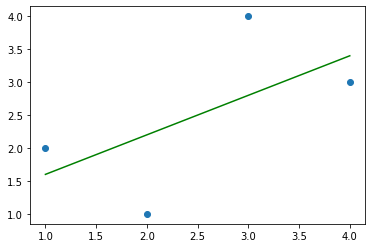

In [7]:
# 회귀선 plot 표현
plt.scatter(X, y)
plt.plot(X, pred, color='green')

# 2. Multivariate Regression(다변량 회귀분석)

### 2.1 Data

In [8]:
bias = 1
beta = np.array([2,3,4,5]).reshape(4, 1)
noise = np.random.randn(100, 1)

In [9]:
X = np.random.randn(100, 4)
y = bias + X.dot(beta)
y_with_noise = y + noise

In [10]:
X[:10]

array([[-0.74057432,  0.45823318,  1.2572469 , -0.44170407],
       [ 0.5413351 ,  0.5672784 , -0.43538181,  0.76681236],
       [ 0.48084856, -0.88128189, -0.68428578,  0.45401778],
       [-0.72516608, -1.43882635,  2.15079225,  0.04869812],
       [ 0.64711296, -1.07448408,  0.24474502,  0.37090588],
       [ 0.41423217,  1.19669386,  1.0824733 ,  0.27691761],
       [ 0.9303673 ,  0.33499986,  1.79409578, -0.95259799],
       [-0.56992369,  0.24691765,  0.51129208, -0.43980433],
       [ 1.79024025,  0.18092909,  0.38195648,  0.51485676],
       [ 0.59167189,  1.9003216 ,  0.60031973, -0.12461753]])

In [11]:
y[:10]

array([[ 3.71401813],
       [ 5.87703996],
       [-1.14920281],
       [ 4.0798484 ],
       [ 1.90428314],
       [11.13302717],
       [ 6.27912737],
       [ 0.44705225],
       [ 9.22537749],
       [ 9.66249986]])

### 2.2 Learning

In [12]:
model = LinearRegression()
model.fit(X, y_with_noise)

# 모델 식 확인
print(model.intercept_)

# 회귀계수 확인
print(model.coef_)

[1.11417641]
[[1.99383579 2.94374717 3.97346537 4.84223742]]


### 2.3 통계적 방법 활용한 회귀식 계산

In [13]:
bias_X = np.array([1]*len(X)).reshape(-1, 1)
stat_X = np.hstack([bias_X, X])
X_X_transpose = stat_X.transpose().dot(stat_X)
X_X_transpose_inverse = np.linalg.inv(X_X_transpose)

In [14]:
stat_beta = X_X_transpose_inverse.dot(stat_X.transpose()).dot(y_with_noise)
stat_beta

array([[1.11417641],
       [1.99383579],
       [2.94374717],
       [3.97346537],
       [4.84223742]])

# 3. Polynomial Regression(다항 회귀분석)

### 3.1 Data

In [15]:
# 비선형 데이터 생성
bias = 1
beta = np.array([2,3]).reshape(2, 1)
noise = np.random.randn(100, 1)

In [16]:
X = np.random.randn(100, 1)
X_poly = np.hstack([X, X**2])

X_poly[:10]

array([[-0.92491748,  0.85547234],
       [ 1.01010697,  1.02031609],
       [ 0.75532068,  0.57050933],
       [ 0.8542725 ,  0.7297815 ],
       [ 0.70907623,  0.5027891 ],
       [ 0.82063592,  0.67344331],
       [ 0.12924242,  0.0167036 ],
       [ 0.07362991,  0.00542136],
       [-0.25463986,  0.06484146],
       [ 0.06335837,  0.00401428]])

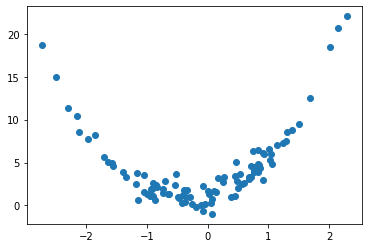

In [17]:
y = bias + X_poly.dot(beta)
y_with_noise = y + noise

plt.scatter(X, y_with_noise)

### 3.2 Learning

In [18]:
# 학습
model = LinearRegression()
model.fit(X_poly, y_with_noise)

# 회귀식
print(model.intercept_)

# 회귀 계수
print(model.coef_)

[1.0466608]
[[2.02459592 2.96023615]]


### 3.3 Predict and Plot

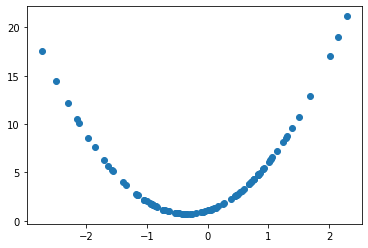

In [19]:
pred = model.predict(X_poly)

plt.scatter(X, pred)